<a href="https://colab.research.google.com/github/TZajas/CS4287-CNN-Project/blob/main/CS4287_Assign2_20278748_20272626_20273118.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CS4287 CNN Project**

---

In [ ]:
# Tomasz Zajas: 20278748 | Cael O'Flaherty: 20272626 | Dawid Sobczak: 20273118
# Runs with no errors

In [ ]:
# Necessary libraries
from IPython.display import display, Image
from google.colab import drive

# For processing dataset
import numpy as np
import pandas as pd
import random
import cv2

# For plotting dataset and model
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# For splitting dataset
from sklearn.model_selection import train_test_split

# For training Models
import time
from keras import backend
from tensorflow import optimizers
from keras.models import Sequential
from keras import layers
from tensorflow import ones
from keras.layers import Conv2D, MaxPool2D, BatchNormalization, Flatten, Dense, Dropout
from numpy import array
from sklearn.model_selection import KFold

## **Dataset Exploration and Visualisation**

---

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing the dataset
y = np.load('Y.npy')
X = np.load('X.npy')


# Displaying the shape of the dataset
print(f"X shape: {X.shape}\nY shape: {y.shape}")


X shape: (2062, 64, 64)
Y shape: (2062, 10)


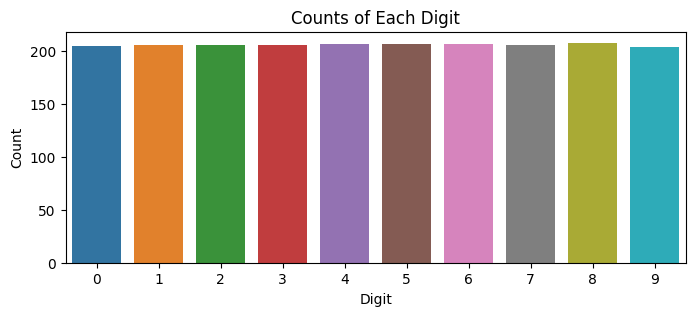

In [ ]:
# Displaying the different amounts of each number in the dataset
# Converting one-hot encoded array into integers
y_as_integers = np.argmax(y, axis = 1)
unique, counts = np.unique(y_as_integers, return_counts=True)

# Displaying bar chart
plt.figure(figsize = (8, 3))
sns.barplot(x=unique, y=counts)
plt.xlabel('Digit')
plt.ylabel('Count')
plt.title('Counts of Each Digit')
plt.show()

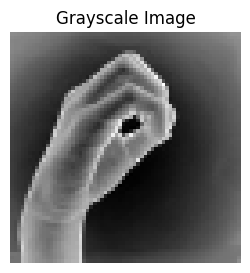

One-Hot Encoding: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Integer Value: 0


In [ ]:
# Displaying an X value in grayscale
plt.figure(figsize = (3, 3))
plt.imshow(X[100], cmap ='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()

# Displaying the Y value(answer), and it's corresponding integer value, to the previous X value
print(f"One-Hot Encoding: {y[100]}\nInteger Value: {np.argmax(y[100])}")


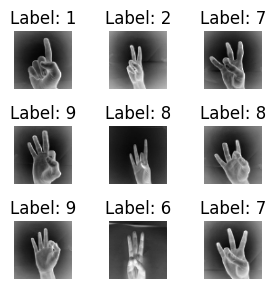

In [ ]:
# Displaying multiple images to check if the correspoding Y values are correct

# Generating an array of 9 random indices
indices = [random.randint(0, 2061) for _ in range(9)]

# Generating grid for corresponding indices
fig, axes = plt.subplots(3, 3, figsize=(3, 3))

for i, ax in enumerate(axes.flat):
    index = indices[i]
    image = X[index]
    label = np.argmax(y[index])  # Convert one-hot encoded label to an integer

    ax.imshow(image, cmap='gray')
    ax.set_title(f"Label: {label}")
    ax.axis('off')

plt.tight_layout()
plt.show()

## **Data Preprocessing**

---



In [ ]:
# Splitting the dataset into train and test using sklearn for our own model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Printing the shape of the split dataset
print("Our model shape")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)
print(" ")

# Resizing the images for AlexNet: 64x64 -> 227x227X3
# Initialize an empty list to store the processed images
processed_images = []
for img in X:
    # Resize each image to 227x227 pixels and convert to RGB format
    img = cv2.resize(img, (227, 227))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    processed_images.append(img)

# Convert the list of images back to a NumPy array
processed_X = np.array(processed_images)

# Splitting the dataset into train and test using sklearn for the AlexNet model
X_train_alex, X_test_alex, y_train_alex, y_test_alex = train_test_split(processed_X, y, test_size = 0.2, random_state = 42)

print("AlexNet shape")
print("X_train:", X_train_alex.shape)
print("X_test:", X_test_alex.shape)
print("y_train:", y_train_alex.shape)
print("y_test:", y_test_alex.shape)

Our model shape
X_train: (1649, 64, 64)
X_test: (413, 64, 64)
y_train: (1649, 10)
y_test: (413, 10)
 
AlexNet shape
X_train: (1649, 227, 227, 3)
X_test: (413, 227, 227, 3)
y_train: (1649, 10)
y_test: (413, 10)


## **AlexNet Model**

---



### AlexNet Model Definition

In [ ]:
# Creating a sequential AlexNet model with the following layers:

# There are 5 convolutional layers - each with varying numbers of filters, strides and kernel sizes.
# There are 5 batch normalisation layers
# There are 3 max pooling layers.
# There is 1 flatten layer.
# There is 2 drop-out layers.
# There are 2 hidden layers and 1 output layer.

alex_net_model = Sequential(name='AlexNet')

alex_net_model.add(Conv2D(filters=96, kernel_size=(11, 11), strides=(4, 4), activation="relu", input_shape=(227, 227, 3)))
alex_net_model.add(BatchNormalization())
alex_net_model.add(MaxPool2D(pool_size=(3, 3), strides= (2, 2)))


alex_net_model.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1, 1), activation="relu", padding="same"))
alex_net_model.add(BatchNormalization())
alex_net_model.add(MaxPool2D(pool_size=(3, 3), strides=(2, 2)))


alex_net_model.add(Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), activation="relu", padding="same"))
alex_net_model.add(BatchNormalization())


alex_net_model.add(Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), activation="relu", padding="same"))
alex_net_model.add(BatchNormalization())

alex_net_model.add(Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation="relu", padding="same"))
alex_net_model.add(BatchNormalization())
alex_net_model.add(MaxPool2D(pool_size=(3, 3), strides=(2, 2)))

alex_net_model.add(Flatten())

alex_net_model.add(Dense(4096, activation="relu"))
alex_net_model.add(Dropout(0.5))

alex_net_model.add(Dense(4096, activation="relu"))
alex_net_model.add(Dropout(0.5))

alex_net_model.add(Dense(10, activation="softmax"))

alex_net_model.compile(optimizer=optimizers.SGD(learning_rate = 0.001), loss='categorical_crossentropy', metrics=['accuracy'])
# This model produces a total of 58,325,066 trainable parameters.

alex_net_model.summary()

Model: "AlexNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 batch_normalization (Batch  (None, 55, 55, 96)        384       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 27, 27, 96)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 batch_normalization_1 (Bat  (None, 27, 27, 256)       1024      
 chNormalization)                                                
                                                           

### AlexNet Model Training

In [ ]:
# Recording the start time
alex_net_start_time = time.time()

# Fitting AlexNet Model
alex_net_history = alex_net_model.fit(X_train_alex, y_train_alex, epochs=50,
                                      batch_size=16, validation_split=0.2)
# prev batch 32, prev epoch 30. drop off? SGDM, Adam

# Recording the end time
alex_net_end_time = time.time()

# Calculating training time
alex_net_training_time = alex_net_end_time - alex_net_start_time

# Printing time it took to train
print(f"Training time: {alex_net_training_time:.2f} seconds")


Epoch 1/50
83/83 [==============================] - 18s 61ms/step - loss: 2.7213 - accuracy: 0.3480 - val_loss: 2.2841 - val_accuracy: 0.0970
Epoch 2/50
83/83 [==============================] - 3s 39ms/step - loss: 1.1337 - accuracy: 0.6513 - val_loss: 2.1996 - val_accuracy: 0.1727
Epoch 3/50
83/83 [==============================] - 3s 38ms/step - loss: 0.6775 - accuracy: 0.7756 - val_loss: 1.8692 - val_accuracy: 0.2606
Epoch 4/50
83/83 [==============================] - 3s 38ms/step - loss: 0.4892 - accuracy: 0.8294 - val_loss: 1.3532 - val_accuracy: 0.4242
Epoch 5/50
83/83 [==============================] - 4s 44ms/step - loss: 0.3885 - accuracy: 0.8582 - val_loss: 0.8129 - val_accuracy: 0.6788
Epoch 6/50
83/83 [==============================] - 4s 45ms/step - loss: 0.3112 - accuracy: 0.8916 - val_loss: 0.4323 - val_accuracy: 0.8303
Epoch 7/50
83/83 [==============================] - 3s 39ms/step - loss: 0.2378 - accuracy: 0.9174 - val_loss: 0.2546 - val_accuracy: 0.9212
Epoch 8/50
8

### AlexNet Model Performance

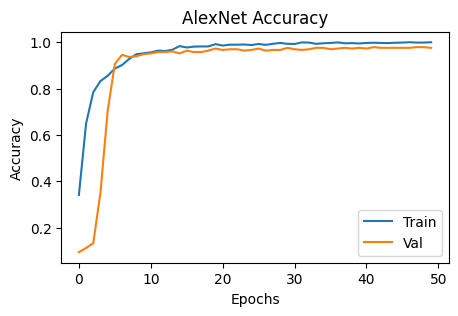

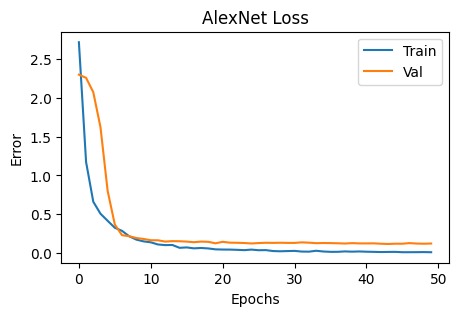

Evaluation of Results on the Test Dataset:
Test Accuracy: 97.34%
Test Loss: 0.0986


In [ ]:
# Extract training accuracy and loss values
alex_net_training_accuracy = alex_net_history.history['accuracy']
alex_net_training_loss = alex_net_history.history['loss']

# Extract validation accuracy and loss values
alex_net_validation_accuracy = alex_net_history.history['val_accuracy']
alex_net_validation_loss = alex_net_history.history['val_loss']

# Plotting Model Accuracy
plt.figure(figsize=(5, 3))
plt.plot(alex_net_training_accuracy)
plt.plot(alex_net_validation_accuracy)
plt.title("AlexNet Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["Train", "Val"], loc="lower right")
plt.show()

# Plotting Model Loss
plt.figure(figsize=(5, 3))
plt.plot(alex_net_training_loss)
plt.plot(alex_net_validation_loss)
plt.title('AlexNet Loss')
plt.ylabel('Error')
plt.xlabel('Epochs')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

# Evaluate the model on the test set
alex_net_test_loss, alex_net_test_accuracy = alex_net_model.evaluate(X_test_alex, y_test_alex, verbose=0)

# Print the test accuracy
print('Evaluation of Results on the Test Dataset:')
print(f'Test Accuracy: {alex_net_test_accuracy * 100:.2f}%')
# Print the test loss
print(f'Test Loss: {alex_net_test_loss:.4f}')

## **Our Model**

---



### Model Definition

In [ ]:
# Defining Model Hyperparameters
EPOCHS = 100
BATCH_SIZE = 16
VALIDATION_SPLIT = 0.2
LOSS_FUNCTION = 'categorical_crossentropy'
METRIC = 'accuracy'
LEARNING_RATE = 0.0001

In [ ]:
# Creating our own model with the following layers

# There is 1 convolutional layers, similar to AlexNet with a smaller kernel
# There is one batch normalisation layers
# There is 1 max pooling layers.
# There is 1 flatten layer.
# There is 1 drop-out layers.
# There is 1 hidden layer and 1 output layer.

# Clearing the session to prevent model from learning from previous runs
backend.clear_session()

model = Sequential(name='Convolutional-Neural-Network')

model.add(Conv2D(filters=96, kernel_size=(9, 9), strides=(3, 3), activation="relu", input_shape=(64, 64, 1)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(3, 3), strides= (2, 2)))

model.add(Flatten())

model.add(Dense(2048, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(10, activation="softmax"))

model.compile(optimizer=optimizers.SGD(learning_rate = LEARNING_RATE), loss=LOSS_FUNCTION, metrics=[METRIC])

model.summary()

Model: "Convolutional-Neural-Network"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 19, 19, 96)        7872      
                                                                 
 batch_normalization (Batch  (None, 19, 19, 96)        384       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 9, 9, 96)          0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 7776)              0         
                                                                 
 dense (Dense)               (None, 2048)              15927296  
                                                                 
 dropout (Dropout)           (None, 20

### Model Training

In [ ]:
# Recording the start time
start_time = time.time()

# Fiting Model
history = model.fit(X_train, y_train, epochs=EPOCHS,
                    batch_size=BATCH_SIZE, validation_split=VALIDATION_SPLIT)

# Recording the end time
end_time = time.time()

# Calculating training time
training_time = end_time - start_time

# Printing time it took to train
print(f"Training time: {training_time:.2f} seconds")


Epoch 1/100
83/83 [==============================] - 2s 13ms/step - loss: 2.5618 - accuracy: 0.1274 - val_loss: 2.2895 - val_accuracy: 0.2091
Epoch 2/100
83/83 [==============================] - 1s 9ms/step - loss: 2.2637 - accuracy: 0.1971 - val_loss: 2.2650 - val_accuracy: 0.3091
Epoch 3/100
83/83 [==============================] - 1s 9ms/step - loss: 2.0158 - accuracy: 0.2790 - val_loss: 2.2235 - val_accuracy: 0.3879
Epoch 4/100
83/83 [==============================] - 1s 9ms/step - loss: 1.9043 - accuracy: 0.3071 - val_loss: 2.1514 - val_accuracy: 0.5273
Epoch 5/100
83/83 [==============================] - 1s 9ms/step - loss: 1.7809 - accuracy: 0.3723 - val_loss: 2.0425 - val_accuracy: 0.5758
Epoch 6/100
83/83 [==============================] - 1s 7ms/step - loss: 1.6693 - accuracy: 0.4253 - val_loss: 1.8904 - val_accuracy: 0.6152
Epoch 7/100
83/83 [==============================] - 1s 7ms/step - loss: 1.5907 - accuracy: 0.4541 - val_loss: 1.7055 - val_accuracy: 0.6212
Epoch 8/100


### Model Evaluation

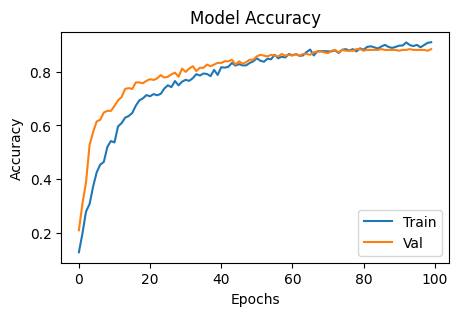

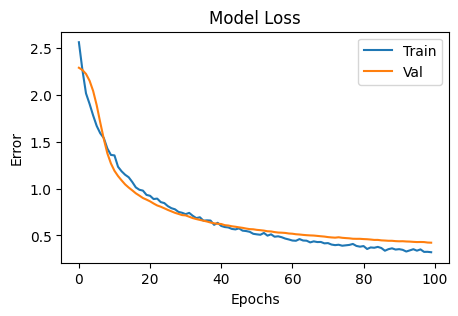

In [ ]:
# Extract training accuracy and loss values
training_accuracy = history.history['accuracy']
training_loss = history.history['loss']

# Extract validation accuracy and loss values
validation_accuracy = history.history['val_accuracy']
validation_loss = history.history['val_loss']

# Plotting Model Accuracy
plt.figure(figsize=(5, 3))
plt.plot(training_accuracy)
plt.plot(validation_accuracy)
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["Train", "Val"], loc="lower right")
plt.show()

# Plotting Model Loss
plt.figure(figsize=(5, 3))
plt.plot(training_loss)
plt.plot(validation_loss)
plt.title('Model Loss')
plt.ylabel('Error')
plt.xlabel('Epochs')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

13/13 [==============================] - 0s 4ms/step


<Figure size 800x800 with 0 Axes>

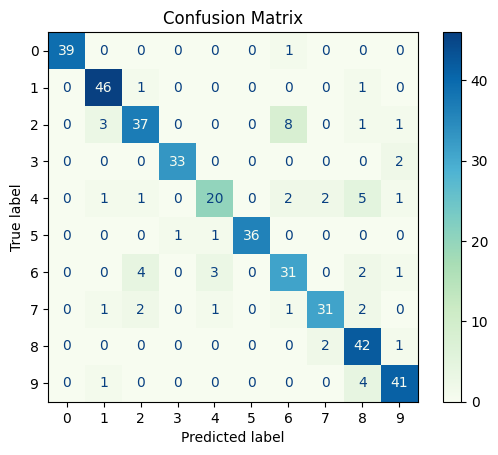


Test Accuracy: 86.20%
Test Loss: 0.4386


In [ ]:
# Displaying confusion matrix
y_pred = model.predict(X_test)

y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Create confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix
classes = [str(i) for i in range(10)]
matrix = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)

plt.figure(figsize=(8, 8))
matrix.plot(cmap='GnBu')
plt.title('Confusion Matrix')
plt.show()

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

# Print the test accuracy
print('')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
# Print the test loss
print(f'Test Loss: {test_loss:.4f}')

### K-Fold Cross Validation

In [ ]:
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
cross_validation_scores = []
output = ""
fold = 1
for train, test in kfold.split(X, y):
  backend.clear_session()
  model = Sequential()

  model.add(Conv2D(filters=96, kernel_size=(9, 9), strides=(3, 3), activation="relu", input_shape=(64, 64, 1)))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(3, 3), strides= (2, 2)))

  model.add(Flatten())

  model.add(Dense(2048, activation="relu"))
  model.add(Dropout(0.5))

  model.add(Dense(10, activation="softmax"))

  model.compile(optimizer=optimizers.SGD(learning_rate = LEARNING_RATE), loss=LOSS_FUNCTION, metrics=['accuracy'])

  # Fit the model
  model.fit(X[train], y[train], epochs=EPOCHS, batch_size=BATCH_SIZE)

  # Evaluate the model
  scores = model.evaluate(X[test], y[test], verbose=0)
  output += ("Fold %d %s: %.2f%%\n" % (fold, model.metrics_names[1], scores[1]*100))
  fold += 1
  cross_validation_scores.append(scores[1] * 100)
print(output)
print("Mean accuracy: %.2f%% (+/- %.2f%% standard deviation)" % (np.mean(cross_validation_scores), np.std(cross_validation_scores)))

Epoch 1/100
116/116 [==============================] - 2s 7ms/step - loss: 2.5347 - accuracy: 0.1375
Epoch 2/100
116/116 [==============================] - 1s 6ms/step - loss: 2.1083 - accuracy: 0.2426
Epoch 3/100
116/116 [==============================] - 1s 6ms/step - loss: 1.8956 - accuracy: 0.3305
Epoch 4/100
116/116 [==============================] - 1s 7ms/step - loss: 1.7260 - accuracy: 0.3887
Epoch 5/100
116/116 [==============================] - 1s 6ms/step - loss: 1.5773 - accuracy: 0.4631
Epoch 6/100
116/116 [==============================] - 1s 6ms/step - loss: 1.4802 - accuracy: 0.5035
Epoch 7/100
116/116 [==============================] - 1s 6ms/step - loss: 1.3869 - accuracy: 0.5601
Epoch 8/100
116/116 [==============================] - 1s 8ms/step - loss: 1.3042 - accuracy: 0.5768
Epoch 9/100
116/116 [==============================] - 1s 8ms/step - loss: 1.2271 - accuracy: 0.6032
Epoch 10/100
116/116 [==============================] - 1s 7ms/step - loss: 1.1636 - accura